<a href="https://colab.research.google.com/github/dsivov/Nebula/blob/master/reid_view.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
%pip install --index-url http://74.82.29.209:8090 nebula3_database==0.2.2 --trusted-host 74.82.29.209

Looking in indexes: http://74.82.29.209:8090, https://us-python.pkg.dev/colab-wheels/public/simple/


In [143]:
%pip install ipywidgets 
# To enable `ipywidgets`
!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [144]:
from database.arangodb import DatabaseConnector 
from ipywidgets import widgets
from IPython.display import display
from IPython.display import Image


In [145]:
reid_data = []
table_data = []
gdb = DatabaseConnector()
db = gdb.connect_db('prodemo')
query = 'FOR doc IN s4_re_id RETURN doc'
cursor = db.aql.execute(query)
for reid in cursor:
  reid_data.append(reid)
  table_data.append(reid['movie_id'])


In [146]:
dropdown_movies = widgets.Dropdown(options = table_data, description = "Movie")
display(dropdown_movies)

Dropdown(description='Movie', options=('Movie/', 'Movies/6570232363811098673', 'Movies/8064232694019412248', '…

Reid Frames for movie:  Movies/8034448873923576862


http://74.82.29.209:9000/datasets/media/frames/actioncliptest00004/re_id/re-id_frame0212.jpg


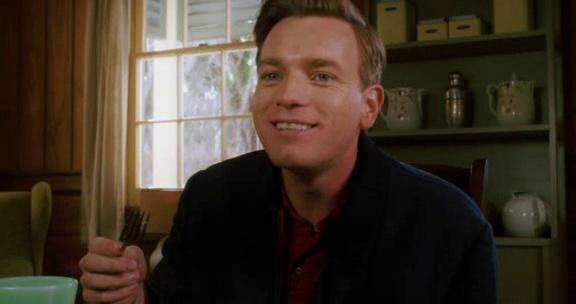


http://74.82.29.209:9000/datasets/media/frames/actioncliptest00004/re_id/re-id_frame0212.jpg


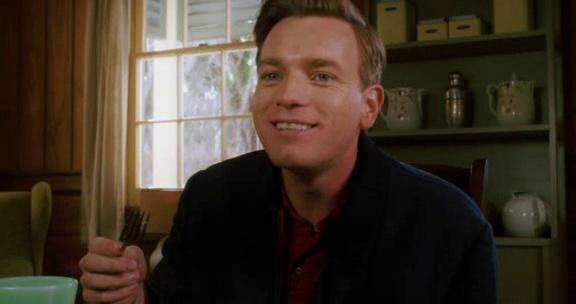


http://74.82.29.209:9000/datasets/media/frames/actioncliptest00004/re_id/re-id_frame0277.jpg


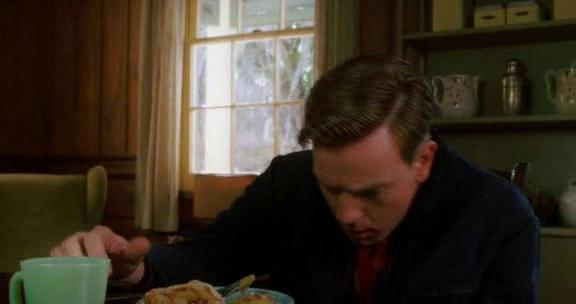


http://74.82.29.209:9000/datasets/media/frames/actioncliptest00004/re_id/re-id_frame0277.jpg


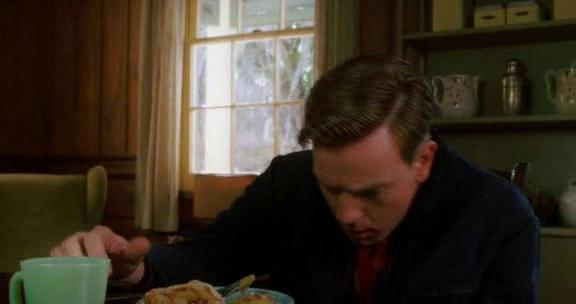


http://74.82.29.209:9000/datasets/media/frames/actioncliptest00004/re_id/re-id_frame0011.jpg


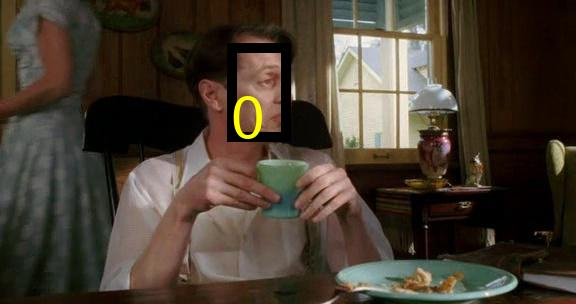


http://74.82.29.209:9000/datasets/media/frames/actioncliptest00004/re_id/re-id_frame0011.jpg


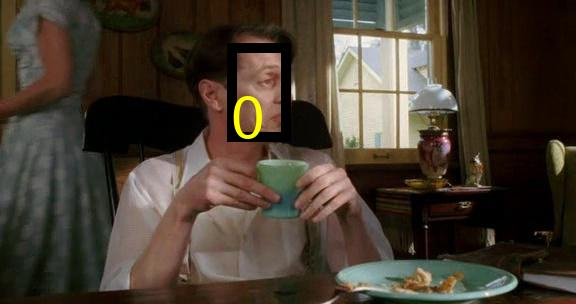

In [149]:
idx = dropdown_movies.index
#print(reid_data)
selectd_reid = reid_data[idx]
print("===================================================")
print("Reid Frames for movie: ", selectd_reid['movie_id'])
print("===================================================")
print()
for reid_frames in selectd_reid['urls']:
  if len(reid_frames) > 0:
    for frame in reid_frames:
      print()
      print(reid_frames['url'])
      img_to_show = Image(reid_frames['url'])
      if img_to_show.data is None:
        print("No images uploaded to WebServer")
      else:
        display(img_to_show)
      #print(reid_frames['frame_number'])
